#Analysis

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

In [3]:
url = 'https://github.com/sehyunlee217/MIE368_proj/blob/main/watson_healthcare_modified.csv?raw=true'

In [4]:
# Read data
df = pd.read_csv(url)

# Drop unnecessary columns
df.drop(columns=['EmployeeID', 'EmployeeCount', 'Shift', 'StandardHours', 'Over18'], inplace=True)

# Split data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Map target variable in training and testing data
train_df['Attrition'] = train_df['Attrition'].map({"Yes": 1, "No": 0})
test_df['Attrition'] = test_df['Attrition'].map({"Yes": 1, "No": 0})

# Convert categorical to numerical for both datasets
train_df['Gender'] = train_df['Gender'].map({'Male': 0, 'Female': 1})
train_df['OverTime'] = train_df['OverTime'].map({'No': 0, 'Yes': 1})
train_df['BusinessTravel'] = train_df['BusinessTravel'].map(
    {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
)

test_df['Gender'] = test_df['Gender'].map({'Male': 0, 'Female': 1})
test_df['OverTime'] = test_df['OverTime'].map({'No': 0, 'Yes': 1})
test_df['BusinessTravel'] = test_df['BusinessTravel'].map(
    {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
)

# Apply one-hot encoding to nominal variables
cols_nom = ['Department', 'EducationField', 'JobRole', 'MaritalStatus']

encoder = OneHotEncoder()

# Fit on training data
encoder.fit(train_df[cols_nom])

# Transform both training and test datasets
train_encoded = pd.DataFrame(encoder.transform(train_df[cols_nom]).toarray(),
                             columns=encoder.get_feature_names_out())
test_encoded = pd.DataFrame(encoder.transform(test_df[cols_nom]).toarray(),
                            columns=encoder.get_feature_names_out())

# Reset index and merge encoded columns back
train_encoded.reset_index(drop=True, inplace=True)
test_encoded.reset_index(drop=True, inplace=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

train_df.drop(columns=cols_nom, inplace=True)
test_df.drop(columns=cols_nom, inplace=True)

train_df = pd.concat([train_df, train_encoded], axis=1)
test_df = pd.concat([test_df, test_encoded], axis=1)


In [5]:
train_df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,EducationField_Other,EducationField_Technical Degree,JobRole_Admin,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,35,0,1,528,8,4,3,0,100,3,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,31,0,1,1463,23,3,2,0,64,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,41,0,1,933,9,4,3,0,94,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,22,0,1,253,11,3,1,1,43,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,23,0,1,373,1,2,4,0,47,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [6]:
# apply SMOTE on X_train
X_train = train_df.drop(columns=['Attrition'])
y_train = train_df['Attrition']
X_test = test_df.drop(columns=['Attrition'])
y_test = test_df['Attrition']

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,EducationField_Other,EducationField_Technical Degree,JobRole_Admin,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,35,1,528,8,4,3,0,100,3,1,...,0.000000,1.000000,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.000000,1.000000
1,31,1,1463,23,3,2,0,64,2,2,...,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000
2,41,1,933,9,4,3,0,94,3,1,...,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000
3,22,1,253,11,3,1,1,43,3,1,...,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.000000,1.000000,0.000000
4,23,1,373,1,2,4,0,47,3,1,...,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,36,2,493,10,2,1,0,42,3,1,...,0.000000,0.449785,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.449785,0.550215
2372,29,1,1250,21,3,1,0,38,3,1,...,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,1.000000,0.000000,0.000000
2373,24,1,688,17,3,2,0,57,3,1,...,0.000000,0.000000,0.0,0.0,0.632241,0.367759,0.0,0.000000,0.632241,0.367759
2374,24,1,1252,11,1,4,1,74,3,1,...,0.585870,0.414130,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.000000,1.000000


In [7]:
y_train_resampled.value_counts()

Attrition
0    1188
1    1188
Name: count, dtype: int64

In [8]:
# fitting Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG, display

CART = DecisionTreeClassifier()
CART.fit(X_train_resampled, y_train_resampled)

train_score = CART.score(X_train, y_train)
test_score = CART.score(X_test, y_test)

# Print out summary of model performance
print('The score of this model over training data is {:.3f} and {:.3f} over the testing data'.format(train_score, test_score))

The score of this model over training data is 0.998 and 0.824 over the testing data


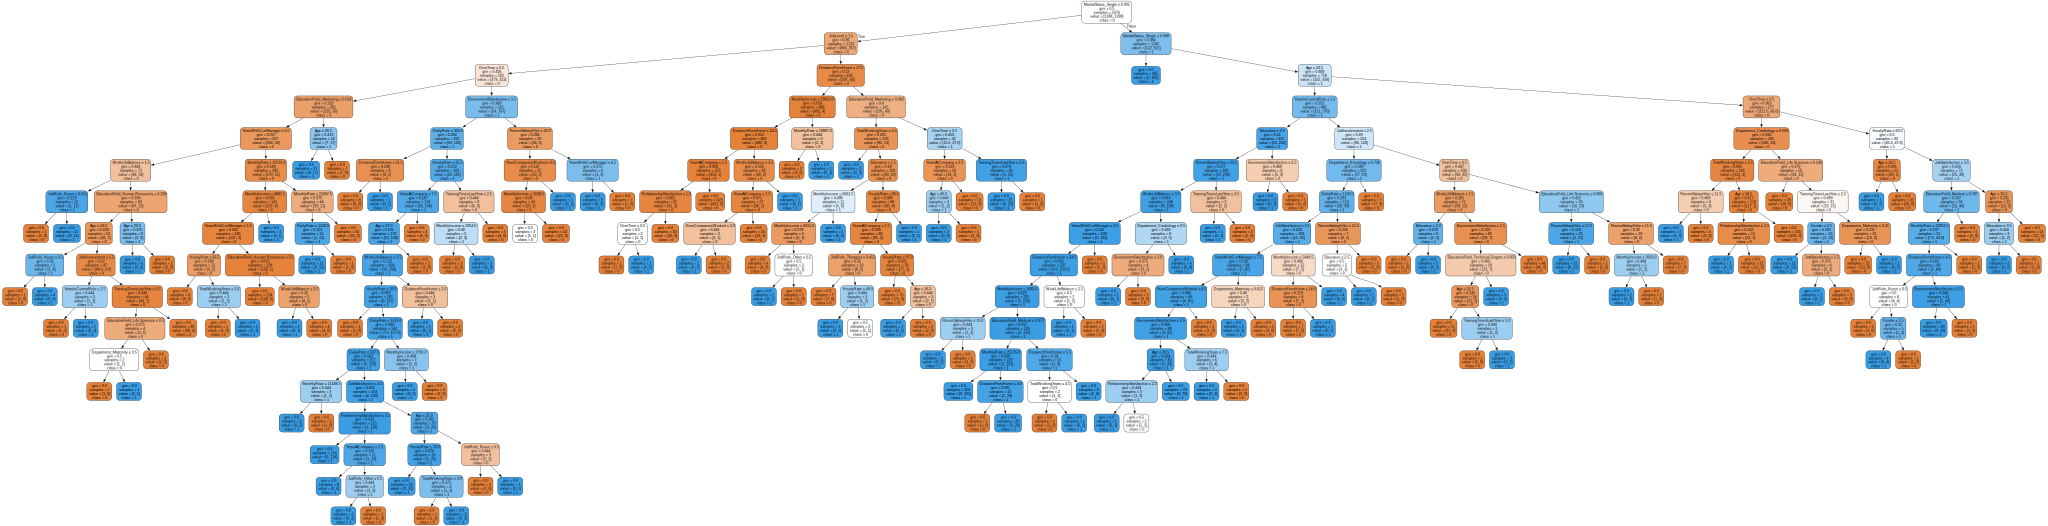

In [9]:
# Visualize the decision tree
dot_data = Source(export_graphviz(CART, out_file=None,
                           feature_names=X_train.columns,
                           class_names=['0', '1'],
                           filled=True, rounded=True,
                           special_characters=True))
display(SVG(dot_data.pipe(format='svg')))

In [10]:
# print out the most important features and their values
feature_importances = CART.feature_importances_
feature_names = X_train.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print(feature_importances)

                            Feature  Importance
41             MaritalStatus_Single    0.345497
0                               Age    0.111496
14                         OverTime    0.105047
9                          JobLevel    0.066176
5           EnvironmentSatisfaction    0.029295
22               YearsInCurrentRole    0.028809
30         EducationField_Marketing    0.024917
3                  DistanceFromHome    0.023449
7                        HourlyRate    0.020536
20                  WorkLifeBalance    0.020392
12                      MonthlyRate    0.020095
8                    JobInvolvement    0.020043
2                         DailyRate    0.017126
11                    MonthlyIncome    0.016210
10                  JobSatisfaction    0.014777
15                PercentSalaryHike    0.014174
29     EducationField_Life Sciences    0.012216
4                         Education    0.011989
19            TrainingTimesLastYear    0.011634
24             YearsWithCurrManager    0

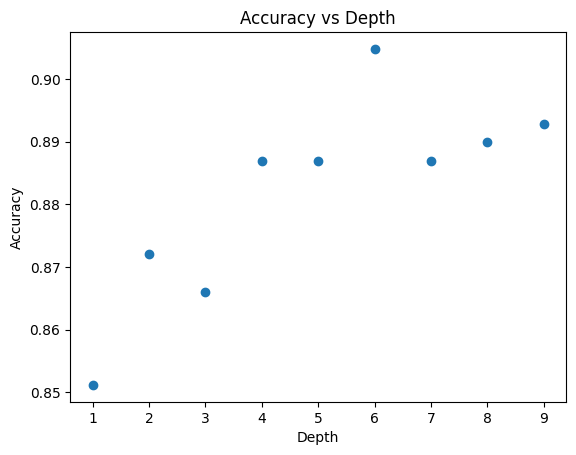

The best performing depth is: 6


In [11]:
depths = range(1, 10)
accuracy = pd.Series(index=depths, dtype=float)

for depth in depths:
  CART.set_params(max_depth=depth)
  CART.fit(X_train, y_train)
  accuracy[depth] = CART.score(X_test, y_test)

plt.scatter(accuracy.index, accuracy.values)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Depth')
plt.show()

# The best performing depth
print(f"The best performing depth is: {accuracy.idxmax()}")

In [12]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter distributions
param_dist = {
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 50)
}

# Perform Search
random_search = RandomizedSearchCV(
    estimator= CART,
    param_distributions=param_dist,
    n_iter=500,
    cv=5,
    verbose=2,
    random_state=1,
    n_jobs=-1,
    return_train_score=True)

# Fit the model
random_search.fit(X_train, y_train)

# Extract the best score and the best hyperparameters
best_score_dt = random_search.best_score_
best_params = random_search.best_params_

# Print the best score and hyperparameters
print(f"Best performance using decision tree is {best_score_dt:.9f} with a max depth of {best_params['max_depth']} and a min samples split of {best_params['min_samples_split']}")

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
[CV] END ..................max_depth=6, min_samples_split=45; total time=   0.0s
[CV] END ..................max_depth=9, min_samples_split=11; total time=   0.0s
[CV] END ..................max_depth=9, min_samples_split=11; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=17; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=17; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=17; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=17; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=17; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=18; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=45; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=45; total time=   0.0s
[CV] END ..................max_depth=1, min_s

In [13]:
# Catboost works better without one-hot encoding
df = pd.read_csv(url)

# Drop unnecessary columns
df.drop(columns=['EmployeeID', 'EmployeeCount', 'Shift', 'StandardHours', 'Over18'], inplace=True)

# Split data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Map target variable in training and testing data
train_df['Attrition'] = train_df['Attrition'].map({"Yes": 1, "No": 0})
test_df['Attrition'] = test_df['Attrition'].map({"Yes": 1, "No": 0})

# Convert categorical to numerical for both datasets
train_df['Gender'] = train_df['Gender'].map({'Male': 0, 'Female': 1})
train_df['OverTime'] = train_df['OverTime'].map({'No': 0, 'Yes': 1})
train_df['BusinessTravel'] = train_df['BusinessTravel'].map(
    {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
)

test_df['Gender'] = test_df['Gender'].map({'Male': 0, 'Female': 1})
test_df['OverTime'] = test_df['OverTime'].map({'No': 0, 'Yes': 1})
test_df['BusinessTravel'] = test_df['BusinessTravel'].map(
    {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
)

# apply SMOTE on X_train
X_train = train_df.drop(columns=['Attrition'])
y_train = train_df['Attrition']
X_test = test_df.drop(columns=['Attrition'])
y_test = test_df['Attrition']

In [14]:
%pip install catboost

from catboost import CatBoostClassifier, Pool


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
%pip install optuna


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
categorical_features = ['Department', 'EducationField', 'JobRole', 'MaritalStatus', 'Gender', 'OverTime', 'BusinessTravel']

cat_model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='Logloss', verbose=True)

cat_model.fit(X_train, 
              y_train,
              cat_features=categorical_features,
              verbose=True
              )


preds_class = cat_model.predict(X_test)
preds_proba = cat_model.predict_proba(y_test)

0:	learn: 0.3201537	total: 58.8ms	remaining: 5.83s
1:	learn: 0.2578593	total: 60ms	remaining: 2.94s
2:	learn: 0.2410384	total: 60.9ms	remaining: 1.97s
3:	learn: 0.2270980	total: 61.8ms	remaining: 1.48s
4:	learn: 0.2080941	total: 62.9ms	remaining: 1.19s
5:	learn: 0.1873131	total: 63.9ms	remaining: 1s
6:	learn: 0.1703477	total: 64.7ms	remaining: 860ms
7:	learn: 0.1604228	total: 65.6ms	remaining: 754ms
8:	learn: 0.1530673	total: 66.5ms	remaining: 672ms
9:	learn: 0.1492079	total: 68.3ms	remaining: 615ms
10:	learn: 0.1491936	total: 69.3ms	remaining: 560ms
11:	learn: 0.1441654	total: 70.2ms	remaining: 515ms
12:	learn: 0.1366099	total: 71ms	remaining: 475ms
13:	learn: 0.1314725	total: 72.3ms	remaining: 444ms
14:	learn: 0.1274664	total: 73.1ms	remaining: 414ms
15:	learn: 0.1254248	total: 74.6ms	remaining: 391ms
16:	learn: 0.1213460	total: 75.3ms	remaining: 368ms
17:	learn: 0.1186513	total: 76.2ms	remaining: 347ms
18:	learn: 0.1133842	total: 77.2ms	remaining: 329ms
19:	learn: 0.1075718	total: 7

In [19]:
import catboost

cat_train_pool = catboost.Pool(X_train, y_train, cat_features=categorical_features)
cat_test_pool = catboost.Pool(X_test, y_test, cat_features=categorical_features)

In [41]:
import catboost
from catboost.utils import eval_metric
import optuna
from optuna.samplers import TPESampler

categorical_features = ['Department', 'EducationField', 'JobRole', 'MaritalStatus', 'Gender', 'OverTime', 'BusinessTravel']

cat_model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='Logloss', verbose=True)

cat_model.fit(X_train, 
              y_train,
              cat_features=categorical_features,
              verbose=0
              )


preds_class = cat_model.predict(X_test)
preds_proba = cat_model.predict_proba(y_test)

def objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.1, 1),
        'depth': trial.suggest_int('depth', 1, 6),
        'boosting_type': trial.suggest_categorical('boosting_type', ['Ordered', 'Plain']),
        'max_ctr_complexity': trial.suggest_int('max_ctr_complexity', 0, 8)
    }

    model = catboost.CatBoostClassifier(**params, random_seed=42)
    model.fit(cat_train_pool, verbose=False)
    y_pred = model.predict(cat_test_pool)
    return accuracy_score(y_pred, y_test)

sampler = TPESampler(seed=123)
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=20)

[I 2024-11-21 12:08:18,383] A new study created in memory with name: no-name-96f05f3e-3d9f-4d73-aa8d-0582b1a51ed7
[I 2024-11-21 12:08:19,346] Trial 0 finished with value: 0.9285714285714286 and parameters: {'learning_rate': 0.7268222670380755, 'depth': 2, 'boosting_type': 'Plain', 'max_ctr_complexity': 6}. Best is trial 0 with value: 0.9285714285714286.
[I 2024-11-21 12:08:23,190] Trial 1 finished with value: 0.9136904761904762 and parameters: {'learning_rate': 0.4807958141120149, 'depth': 6, 'boosting_type': 'Ordered', 'max_ctr_complexity': 3}. Best is trial 0 with value: 0.9285714285714286.
[I 2024-11-21 12:08:25,641] Trial 2 finished with value: 0.9166666666666666 and parameters: {'learning_rate': 0.4088602145357825, 'depth': 5, 'boosting_type': 'Ordered', 'max_ctr_complexity': 3}. Best is trial 0 with value: 0.9285714285714286.
[I 2024-11-21 12:08:26,560] Trial 3 finished with value: 0.9226190476190477 and parameters: {'learning_rate': 0.7641958651588321, 'depth': 2, 'boosting_type

In [42]:
study.best_params

{'learning_rate': 0.7111094911557769,
 'depth': 1,
 'boosting_type': 'Plain',
 'max_ctr_complexity': 8}

In [44]:
categorical_features = ['Department', 'EducationField', 'JobRole', 'MaritalStatus', 'Gender', 'OverTime', 'BusinessTravel']

cat_model = CatBoostClassifier(iterations=100, depth=1, learning_rate=0.7111094911557769, boosting_type='Plain', max_ctr_complexity=8)

cat_model.fit(X_train, 
              y_train,
              cat_features=categorical_features,
              verbose=0
              )


preds_class = cat_model.predict(X_test)
preds_proba = cat_model.predict_proba(y_test)

print(accuracy_score(y_test, preds_class))


0.9315476190476191


In [45]:
preds_class

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

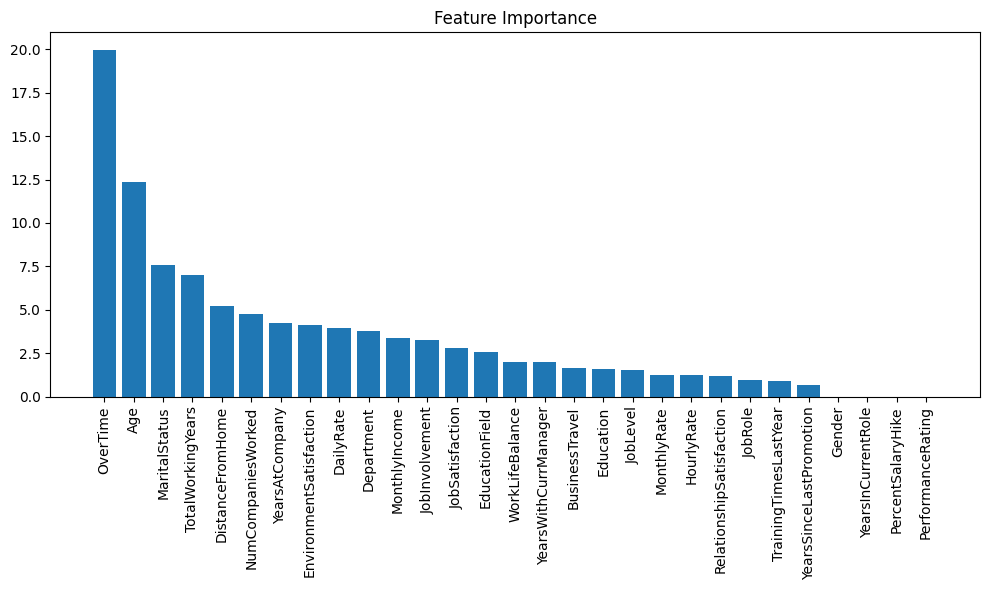

In [46]:
import numpy as np
# Get feature importances and names directly from X_train
importances = cat_model.get_feature_importance()
feature_names = X_train.columns
sorted_idx = np.argsort(importances)[::-1]

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_idx])
plt.xticks(range(len(importances)), feature_names[sorted_idx], rotation=90)
plt.title("Feature Importance")
plt.tight_layout()  # Ensures labels are visible
plt.show()

In [47]:
print("Classification Report:")
print(classification_report(y_test, preds_class))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       289
           1       0.90      0.57      0.70        47

    accuracy                           0.93       336
   macro avg       0.92      0.78      0.83       336
weighted avg       0.93      0.93      0.92       336



In [49]:
y_test.value_counts()

Attrition
0    289
1     47
Name: count, dtype: int64

In [48]:
289/(289+47)

0.8601190476190477